# Problem Statement
The Olympic Games, considered to be the world's foremost sports competition has more than 200 nations participating across the Summer and Winter Games alternating by occurring every four years but two years apart.

Throughout this project, let's explore the Olympics dataset(scraped from https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table) , look at some interesting statistics and then try to find out which country is the King of Olympic Games.


# About Dataset

The dataset has details of 146 countries with following 16 features:

|Features|Description|
|-----|-----|
|Country_Name| Name of the country|
|Summer| No. of games played in Summer Olympics|
|Gold_Summer |No. of gold medals won in Summer Olympics|
|Silver_Summer| No. of silver medals won in Summer Olympics|
|Bronze_Summer| No. of bronze medals won in Summer Olympics|
|Total_Summer| Total no. of all the medals won in Summer Olympics|
|Winter| No. of games played in Winter Olympics|
|Gold_Winter| No. of gold medals won in Winter Olympics|
|Silver_Winter| No. of silver medals won in Winter Olympics|
|Bronze_Winter| No. of bronze medals won in Winter Olympics
|Total_Winter| Total no. of all the medals won in Winter Olympics|
|Games| Total no. of games played in both Summer and Winter Olympics|
|Gold_Total| Total no. of gold medals won in both Summer and Winter Olympics|
|Silver_Total| Total no. of silver medals won in both Summer and Winter Olympics|
|Bronze_Total| Total no. of bronze medals won in both Summer and Winter Olympics|
|Total| Total no. of all the medals won in both Summer and Winter Olympics|

___

# Imports

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style # for styling the graphs
# style.available (to know the available list of styles)
style.use('ggplot') # chosen style
plt.rc('xtick',labelsize=13) # to globally set the tick size
plt.rc('ytick',labelsize=13) # to globally set the tick size
import seaborn as sns

# To print multiple outputs together
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Change column display number during print
pd.set_option('display.max_columns', 500)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# To display float with 2 decimal, avoid scientific printing
pd.options.display.float_format = '{:.2f}'.format

# Data Loading

In [83]:
data = pd.read_csv('Olympic.csv')
data.rename(columns={'Total':'Total_Medals'},inplace=True)
data.head(10)

,Country_Name,# Summer,Gold_Summer,Silver_Summer,Bronze_Summer,Total_Summer,# Winter,Gold_Winter,Silver_Winter,Bronze_Winter,Total_Winter,# Games,Gold_Total,Silver_Total,Bronze_Total,Total_Medals
0,Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
5,Australia,25,139,152,177,468,18,5,3,4,12,43,144,155,181,480
6,Austria,26,18,33,35,86,22,59,78,81,218,48,77,111,116,304
7,Azerbaijan,5,6,5,15,26,5,0,0,0,0,10,6,5,15,26
8,Bahamas,15,5,2,5,12,0,0,0,0,0,15,5,2,5,12
9,Bahrain,8,0,0,1,1,0,0,0,0,0,8,0,0,1,1


# EDA

### Some Countries love Summer, some Winter. Maybe it has to do something with their Olympic performance.

#### Which olympic event does a country perform better in?

In [48]:
data['Better_Event'] = np.where(data['Total_Summer'] > data['Total_Winter'] , 'Summer', 'Winter')
data['Better_Event'] =np.where(data['Total_Summer'] ==data['Total_Winter'],'Both',data['Better_Event']) 
data['Better_Event'].value_counts().index.values[0]

'Summer'

### Finding out the best performing countries across all events

#### Which are the top 10 performing teams at summer event (with respect to total medals), winter event and overall?

In [50]:
top_countries=data[['Country_Name','Total_Summer', 'Total_Winter','Total_Medals']][:-1]

def top_ten(data, col):
    country_list=[]
    country_list= list((data.nlargest(10,col)['Country_Name']))
    return country_list


top_10_summer=top_ten(top_countries,'Total_Summer')
print("Top 10 Summer:\n",top_10_summer, "\n")

top_10_winter=top_ten(top_countries,'Total_Winter')
print("Top 10 Winter:\n",top_10_winter, "\n")

top_10=top_ten(top_countries,'Total_Medals')
print("Top 10:\n",top_10, "\n")

Top 10 Summer:
 ['United States', 'Soviet Union', 'Great Britain', 'France', 'Germany', 'Italy', 'Sweden', 'Hungary', 'China', 'Australia'] 

Top 10 Winter:
 ['Norway', 'United States', 'Austria', 'Germany', 'Soviet Union', 'Canada', 'Finland', 'Sweden', 'Switzerland', 'Russia'] 

Top 10:
 ['United States', 'Soviet Union', 'Great Britain', 'Germany', 'France', 'Italy', 'Sweden', 'China', 'East Germany', 'Russia'] 



#### What teams are present in all of the three lists above?

In [51]:
common=list(set(top_10_summer) & set(top_10_winter) & set(top_10))
print('Common Countries :\n', common, "\n")

Common Countries :
 ['Soviet Union', 'Germany', 'Sweden', 'United States'] 



#### Let's plot the medal count of the top 10 countries for better visualisation

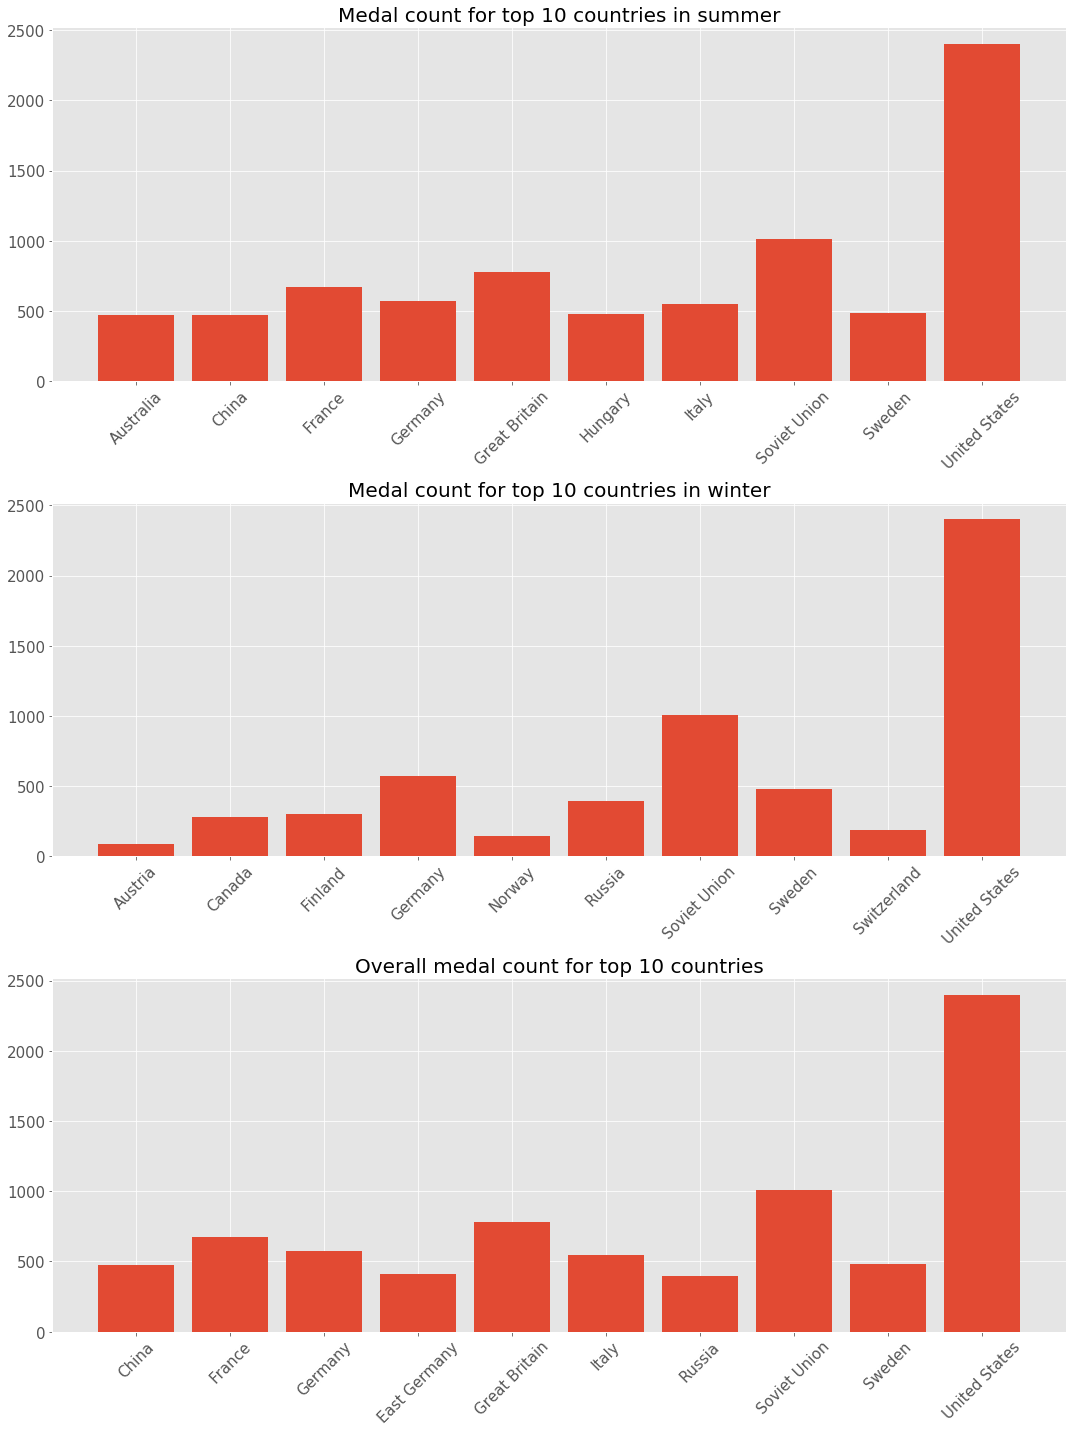

In [62]:
summer_df = data[data['Country_Name'].isin(top_10_summer)]
winter_df = data[data['Country_Name'].isin(top_10_winter)]
top_df = data[data['Country_Name'].isin(top_10)]

fig, ax = plt.subplots(3,1, figsize=(15,20));
ax[0].bar(summer_df['Country_Name'], summer_df['Total_Summer']);
ax[0].set_title('Medal count for top 10 countries in summer', fontsize=20);
ax[0].tick_params(axis='both', labelsize=15);
ax[0].tick_params(axis='x', rotation=45);

ax[1].bar(winter_df['Country_Name'], winter_df['Total_Summer']);
ax[1].set_title('Medal count for top 10 countries in winter', fontsize=20);
ax[1].tick_params(axis='both', labelsize=15);
ax[1].tick_params(axis='x', rotation=45);

ax[2].bar(top_df['Country_Name'], top_df['Total_Summer']);
ax[2].set_title('Overall medal count for top 10 countries', fontsize=20);
ax[2].tick_params(axis='both', labelsize=15);
ax[2].tick_params(axis='x', rotation=45);

fig.tight_layout();

### Which country has had the best performance with respect to the ratio between gold medals won and total medals won?

In [66]:
#For Summer List
summer_df['Golden_Ratio']=summer_df['Gold_Summer']/summer_df['Total_Summer']
summer_max_ratio=max(summer_df['Golden_Ratio'])
summer_country_gold=summer_df.loc[summer_df['Golden_Ratio'].idxmax(),'Country_Name']

print("Top Summer Country:", summer_country_gold, " with a ratio of %.2f" %summer_max_ratio )


#For Winter List
winter_df['Golden_Ratio']=winter_df['Gold_Winter']/winter_df['Total_Winter']
winter_max_ratio=max(winter_df['Golden_Ratio'])
winter_country_gold=winter_df.loc[winter_df['Golden_Ratio'].idxmax(),'Country_Name']

print("Top Winter Country:", winter_country_gold, " with a ratio of %.2f" %winter_max_ratio )


#For Overall List
top_df['Golden_Ratio']=top_df['Gold_Total']/top_df['Total_Medals']
top_max_ratio=max(top_df['Golden_Ratio'])
top_country_gold=top_df.loc[top_df['Golden_Ratio'].idxmax(),'Country_Name']

print("Top Country:", top_country_gold, " with a ratio of %.2f" %top_max_ratio )

Top Summer Country: China  with a ratio of 0.42
Top Winter Country: Soviet Union  with a ratio of 0.40
Top Country: China  with a ratio of 0.40


### Which country has won most gold? This is equivalent to being the best overall perfomer.

#### Here Total_Points which is a weighted value where each gold medal counts for 3 points, silver medals for 2 points, and bronze medals for 1 point.

In [76]:
data_1 = data.drop(data.tail(1).index)

data_1['Total_Points'] = (3 * data_1['Gold_Total']) + (2 * data_1['Silver_Total']) + (data_1['Bronze_Total'])

most_points = data_1['Total_Points'].max()
best_country = data_1.loc[data_1['Total_Points'].idxmax(), 'Country_Name']
print('\033[1m' + best_country + '\033[0m' + ' is the best overall performer.')

United States is the best overall performer.


#### Visualise their success 

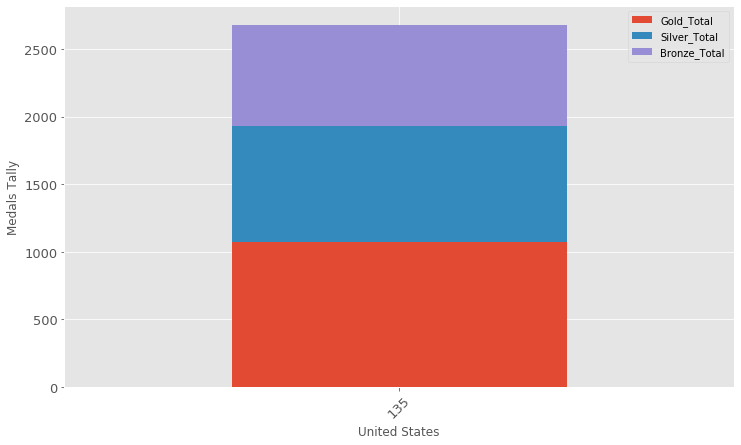

In [82]:
best = data[data['Country_Name'] == best_country]
best = best[['Gold_Total','Silver_Total','Bronze_Total']]
best.plot.bar(stacked=True, figsize=(12,7));
plt.xlabel('United States');
plt.ylabel('Medals Tally');
plt.xticks(rotation=45);

___